<a href="https://colab.research.google.com/github/sprucesunday777/nsisong-data-science/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

house=pd.read_csv('houseprice.csv')
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


exploratory data analysis

In [2]:
house.shape


(4600, 18)

In [3]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
house['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [8]:
house['yr_built'].unique()

array([1955, 1921, 1966, 1963, 1976, 1938, 1989, 1985, 1945, 1948, 1909,
       1980, 1939, 1965, 1956, 1997, 1987, 1983, 1923, 1954, 2005, 1991,
       1959, 1920, 1979, 1951, 1967, 2004, 2014, 1995, 1944, 1992, 1957,
       1978, 1974, 1950, 1990, 1949, 1968, 1977, 1996, 2001, 2000, 1929,
       2006, 2008, 2009, 2012, 2013, 2007, 1986, 1973, 1988, 1900, 1928,
       1982, 1960, 2003, 1998, 1942, 1908, 1958, 1971, 1975, 1961, 1924,
       1902, 1962, 1953, 1999, 1994, 1930, 1984, 2010, 1912, 1947, 1916,
       1940, 1970, 1952, 1964, 1926, 1905, 1969, 1903, 1943, 1993, 1946,
       1910, 1904, 1981, 1906, 1922, 2011, 2002, 1917, 1913, 1914, 1937,
       1925, 1932, 1918, 1972, 1941, 1919, 1936, 1911, 1927, 1931, 1901,
       1907, 1915, 1935, 1933, 1934])

In [9]:
house['yr_built'].mode()

0    2006
dtype: int64

In [10]:
house['yr_built'].sort_values(ascending=False)[0:5]

3356    2014
940     2014
2269    2014
2263    2014
149     2014
Name: yr_built, dtype: int64

In [12]:
house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

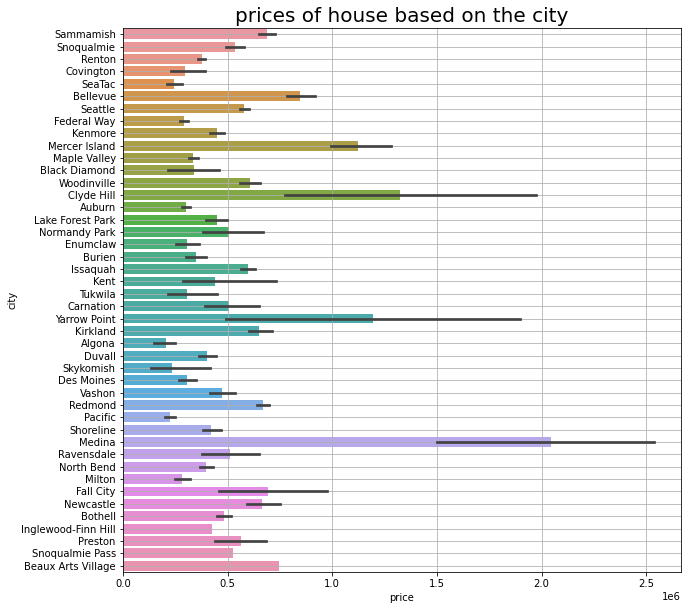

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
house.sort_values('price', axis=0, ascending=True, inplace=True)
sns.barplot(y=house['city'], x=house['price'], data=house,orient='h')
plt.title('prices of house based on the city',fontsize=20)
plt.grid()
plt.show()

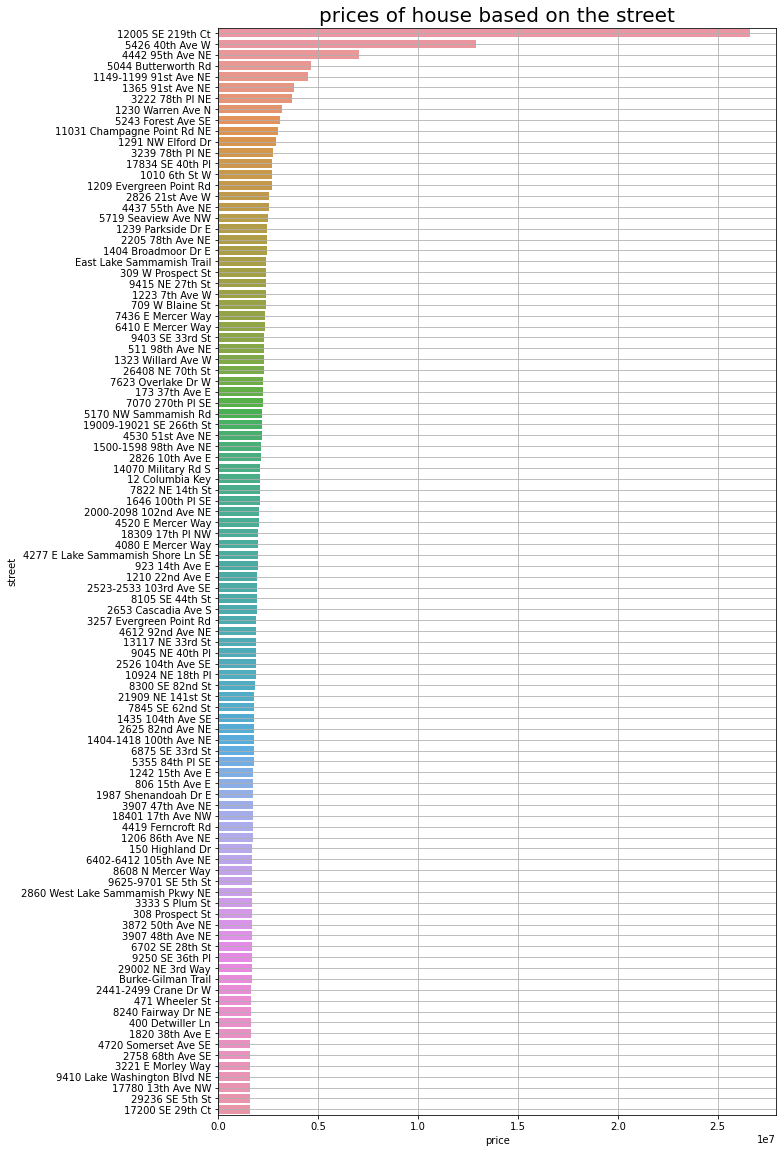

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
house.sort_values('price', axis=0, ascending=False, inplace=True)
sns.barplot(y=house['street'][:100], x=house['price'], data=house,orient='h')
plt.title('prices of house based on the street',fontsize=20)
plt.grid()
plt.show()

now let divide the data into "attributes" (inputs) and "labels" (outputs) for prediction

let price be our dependent varible while bedrooms,yr_built and yr_renovated be our independent varible

In [16]:
x=house[['bedrooms','yr_built','yr_renovated']]
y=house['price']

In [17]:
from sklearn.model_selection import train_test_split as tts
x_test,x_train,y_test,y_train=tts(x,y,test_size=0.25)

In [18]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((3450, 3), (1150, 3), (3450,), (1150,))

In [19]:
from sklearn.linear_model import LinearRegression as lg
model=lg()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
x_predict=model.predict(x_test)
x_predict

array([505923.72440486, 390127.84857709, 491660.52642395, ...,
       858162.25042969, 608616.1937032 , 612772.53423306])

In [24]:
model.predict([[2.0,1963,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([401153.08484159])

In [25]:
x_test.head()

,bedrooms,yr_built,yr_renovated
1289,3.0,1984,0
2783,2.0,1942,1999
3128,3.0,1969,2010
246,3.0,1959,0
2231,4.0,1973,0


In [26]:
y_test.head()

1289    255000.0
2783    240000.0
3128    326000.0
246     675000.0
2231    650000.0
Name: price, dtype: float64

In [27]:
x_test['new_predict']=x_predict
x_test.head()

,bedrooms,yr_built,yr_renovated,new_predict
1289,3.0,1984,0,505923.724405
2783,2.0,1942,1999,390127.848577
3128,3.0,1969,2010,491660.526424
246,3.0,1959,0,518912.288561
2231,4.0,1973,0,627319.726088


In [28]:
from sklearn import metrics 
m=metrics.mean_absolute_error(y_test, x_predict) 
m

232465.26035253648